# SV Data Analysis

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os, sys
sys.path.insert(0, '/Users/jocelynornelasmunoz/Desktop/structural_variants/lib')
sys.path.insert(0, '/Users/jocelynornelas/iCloud Drive (Archive)/Desktop/UC Merced/Research/structural_variants/lib')
DATA_PATH='/Users/jocelynornelasmunoz/Desktop/structural_variants/data/simulated/4p_4c_coverage'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from sklearn import metrics
import confusion_matrix as confmat

# Define function to plot ROC curves

In [3]:
def plot_ROC(path):
    data = json.loads(open(path).read())
    fhat_SPIRAL = np.array(data['fhat_SPIRAL'])
    fhat_NEBULA = np.array(data['fhat_NEBULA'])
    f_true = np.array(data['f_true'])
    fpr_SPIRAL, tpr_SPIRAL, thresholds_SPIRAL = metrics.roc_curve(f_true, fhat_SPIRAL, pos_label=1)
    fpr_NEBULA, tpr_NEBULA, thresholds_NEBULA = metrics.roc_curve(f_true, fhat_NEBULA, pos_label=1)
    roc_auc_SPIRAL = metrics.auc(fpr_SPIRAL, tpr_SPIRAL)
    roc_auc_NEBULA = metrics.auc(fpr_NEBULA, tpr_NEBULA)
    display_SPIRAL = metrics.RocCurveDisplay(fpr=fpr_SPIRAL, tpr=tpr_SPIRAL, roc_auc=roc_auc_SPIRAL, estimator_name='SPIRAL')
    display_NEBULA = metrics.RocCurveDisplay(fpr=fpr_NEBULA, tpr=tpr_NEBULA, roc_auc=roc_auc_NEBULA, estimator_name='NEBULA')
    display_SPIRAL.plot()
    display_NEBULA.plot()
    plt.show()

# Plot results

In [4]:
laptop_path = '/Users/jocelynornelas/iCloud Drive (Archive)/Desktop/UC Merced/Research/structural_variants/'
desktop_path = '/Users/jocelynornelasmunoz/Desktop/structural_variants/data/simulated/'

In [11]:
tau = [100,150,500]
gamma = [num*10 for num in tau]

In [12]:
gamma

[1000, 1500, 5000]

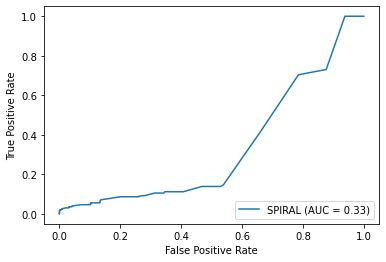

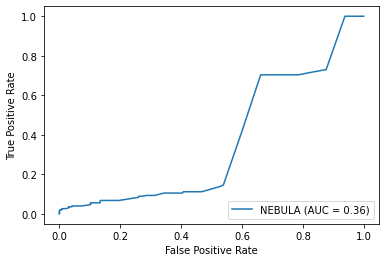

In [14]:
plot_ROC(desktop_path + 'reconstruction_100000size_2novel_%.2ftau_%.2fgamma.json'%(tau[0], gamma[0]))

In [16]:
data = json.loads(open(desktop_path + 'reconstruction_100000size_2novel_%.2ftau_%.2fgamma.json'%(tau[0], gamma[0])).read())

In [17]:
data['fhat_SPIRAL']

[1982680.402472158,
 -151259.11815883502,
 1982680.402472158,
 1982680.402472158,
 1982680.402472158,
 -151259.11815883502,
 -151259.11815883502,
 4116619.922498966,
 -151259.11815883502,
 1982680.402472158,
 -151259.11815883502,
 -151259.11815883502,
 1982680.402472158,
 4116619.922498966,
 -151259.11815883502,
 4116619.922498966,
 1982680.402472158,
 -151259.11815883502,
 4116619.922498966,
 1982680.402472158,
 4116619.922498966,
 1982680.402472158,
 1982680.402472158,
 1982680.402472158,
 -151259.11815883502,
 6250559.442530565,
 1982680.402472158,
 -151259.11815883502,
 4116619.922498966,
 1982680.402472158,
 -151259.11815883502,
 -151259.11815883502,
 -151259.11815883502,
 -151259.11815883502,
 4116619.922498966,
 4116619.922498966,
 -151259.11815883502,
 4116619.922498966,
 4116619.922498966,
 1982680.402472158,
 4116619.922498966,
 1982680.402472158,
 1982680.402472158,
 -151259.11815883502,
 -151259.11815883502,
 4116619.922498966,
 6250559.442530565,
 4116619.922498966,
 -1512

In [8]:
from confusion_matrix import heatmap, annotate_heatmap
import sklearn

con_mat = sklearn.metrics.confusion_matrix(f_true,f_hat,normalize='true')
axlabels=['SV', 'Not SV']

fig, ax = plt.subplots()
im, cbar = heatmap(con_mat, axlabels, axlabels, ax=ax,cmap = 'Blues', cbarlabel="Probability")
plt.ylabel("Truth")
plt.xlabel("Prediction")
texts = annotate_heatmap(im, valfmt="{x:.3f}")

NameError: name 'f_true' is not defined